# Geomechanical Models

These models describe the magnitude and orientation of the stress tensor, as well as how those stresses resolve onto features like wells (c.f. 1-openhole-logs.ipynb) and fractures (c.f., 4-3Dmohr-plots.ipynb). 

<img src="images/stress-04.png" alt="Drawing" style="width: 1200px;"/>

Equations in this notebook come from Jaeger (2007) and Zoback (2010) unless otherwise indicated. 

## Effective stress

Where the principle components of the stress tensor are conceptualised as squeezing the cube in the figure above, pore pressure is oppositional to that force. 

_Effective stress_ describes this combined effect of the stress tensor and pore pressure, and it's found by subtracting pore pressure from the is the principle components of the stress tensor. 

## Pore pressure in geothermal reserviors

In a geothermal reservoir, pore pressure is typically close to hydrostatic (Fournier, 1991) but, as shown in the figure below, temperature modifies this gradient. Overpressure (i.e., pore pressures greater than hydrostatic) may be generated in isolated pore spaces within sedimentary basins where processes like compaction or tectonic compression have occurred (Zoback, 2010), but because high-temperature geothermal reservoirs are convection cells that exploite connected porosity, they maintain near-hydrostatic conditions. A steam cap will, however, may appear overpressured in comparsion to the regional hydrostatic because it transmits the pressure at the liquid-steam interface (i.e., isobaric pressure).

The pressure pivot point is the only location on a measured geothermal well pressure profile that is fixed to reservoir pressure (Grant and Bixley, 2011). The remainder of the pressure profile depends on the temperature, and therefore density, of the fluid inside the well. Pressure profiles for a connected liquid reservior are found using linear interpolation of pivot poits measured in multiple wells (e.g., the figure below). Pressure within a steam zone (above the liquid level but below the clay cap) is found by calculating the steam saturation pressure.  

Prior to drilling, an approximate reservoir pressure may be generated if a reasonable estimate of reservoir temperature and phase has been ascertained using gas and liquid geochemistry of natural surface discharges, in particaulr geothermometers and the solublility of silica if silica sinters are present.

<img src="images/stress-03.png" alt="Drawing" style="width: 1200px;"/>

## Modelling stress using the Coulomb Frictional Failure criterion

The Coulomb Frictional Failure criterion is an empirical relationship describes the conditions where an optimally oriented fault or fracture will fail (Byerlee, 1978). Where the magnitude of stress in the crust is controlled by active faults and fractures, as is the case for geothermal districts located in settings with active tectonics, this criterion may be used to infer the minimum bound of Smin. 

Where pore pressure and vertical stress are constrained, the Coulomb Frictional Failure criterion in the form of the equation 1 constrains the the minimum bound of Shmin in normal faulting regimes. In locations where strike-slip faulting dominates, this method generates an estimate for Shmin that is equal to (transitional stress state) or lower than the in situ conditions.  

> $ \frac{S'_{max}}{S'_{min}} = \frac{S_v-P_p}{S_{hmin}-P_p} = [(\mu^2+1)^{\frac{1}{2}}+\mu]^2 $   **(eq. 1)**

## Measuring the minimum stress while drilling

The minimum stress can be measured during drilling using pressure tests conducted at the casing shoe (XLOT/LOT). Test methodology is described in the figure below and a detailed discussion of these testing techniques are described in Wallis et al. (2021 - submitted WGC). 

<img src="images/stress-02.png" alt="Drawing" style="width: 1200px;"/>


## Modelling the vertical stresses

Vertical stress is found by intergrating for the weight of rock and fluid with depth:

>$  S_v = \int_{z}^{0} \rho(z')g(z')dz' $ **(eq. 2)**

Where the mean rock density that accounts for both rock and pore-fluid density is defined as:

>$ \overline{\rho}=(1-\phi)\rho + \phi\rho_f $ **(eq. 3)**


## Modelling maximum horizontal stress

The maximum horizontal stress can be approximated by combining observations of drilling induced damage on the borehole wall (i.e. tensile fracture and borehole breakout) with forward or inverse models for how the stress tensor resolves onto the borehole wall. The analytical solution for how stress resolves onto an inclined borehole is described by Peška and Zoback (1995).

If this modelling has not been done, then a the maximum horizontal stress can be approximated if the tectonic setting is known. For example, the case study modelled in Wallis et al (2020), the maximum horizontal stress likely lies between the vertical stress and the minimum stress. The following equation was used to approximate SHmax in the _Stress State 1_ model scenario:

> $ S_{Hmax} = \frac{S_v-S_{hmin}}{2}+S_{hmin} $ **(eq. 4)**

For the _Stress State 2_ model scenario, SHmax was increased to nearly Sv to simulate a scenario where the stress setting lies on the cusp between normal and strike-slip faulting dominated regimes. 

These models and the results in terms of fracture slip tendency are discussed in 4-3Dmorh-plots.ipynb

## Stress polygons

Stress polygons, which are sometimes referred to as a Zoback-a-gram, describe the minimum and maximum horizontal stresses allowable based on the Mohr-coloumb failure criterion (aka Coulomb Frictional Failure criterion eq 1). 

The stress polygon is derived for a single depth (i.e., a known value for vertical stress and pore pressure). The outer edge of the polygons ascribe the stress ratio where an optimally oriented fault or fracture will fail. All stress states will be above the unit slope on the plot because $S_{hmin} \leq S_{Hmax}$.

The function used to create the stress polygon below was coded using the method in Moos and Zoback (1990)

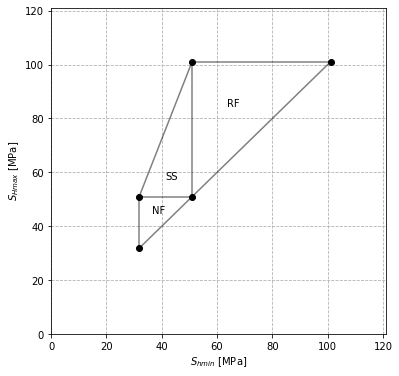

In [1]:
import functions as fun
%matplotlib inline

obsdepth = 2000                             # depth of the stress polygon (observation depth)
density = 2600                              # rock density kg/m3
mdepth = 5000                               # max depth of the overburden model
Sv = fun.linSv(mdepth,obsdepth,density)     # use the linear density Sv function to approximate the overburden
Pp = obsdepth/1000 * 10                     # assume cold hydrostatic (10 MPa per km)
mu = 0.5                                    # coefficient of friction

fun.poly(Sv,Pp,mu,figname='HoopStress_StressPolygonTest')

## Citations

Byerlee, J., 1978, Friction of rocks: Pure and Applied Geophysics PAGEOPH, v. 116, no. 4-5, p. 615-626.

Fournier, R. O., 1991, The transition from hydrostatic to greater than hydrostatic fluid pressure in presently active continental hydrothermal systems in crystalline rock: Geophysical Research Letters, v. 18, no. 5.

Grant, M. A., and Bixley, P. F., 2011, Geothermal Reservoir Engineering, Burlington, MA, Elsevier.

Jaeger, J. C., 2007, Fundamentals of rock mechanics, Malden, MA, Malden, MA : Blackwell Pub. 2007.

Moos, D., and Zoback, M. D., 1990, Utilization of observations of well bore failure to constrain the orientation and magnitude of crustal stresses: Application to continental, Deep Sea Drilling Project, and Ocean Drilling Program boreholes: Journal of Geophysical Research: Solid Earth, v. 95, no. B6, p. 9305-9325.

Peška, P., and Zoback, M. D., 1995, Compressive and tensile failure of inclined well bores and determination of in situ stress and rock strength: Journal of Geophysical Research: Solid Earth, v. 100, no. B7, p. 12791-12811.

Wallis, I.C., Rowland, J. V. and Dempsey, D. E., Allan, G., Sidik, R., Martikno, R., McLean, K., Sihotang, M., Azis, M. and Baroek, M. 2020 (submitted) Approaches to imaging feedzone diversity with case studies from Sumatra, Indonesia, and the Taupō Volcanic Zone, New Zealand. New Zealand Geothermal Workshop: Waitangi, New Zealand.

Wallis, I., Pye, D.S., Dempsey, D., Rowland, J. 2021 (submitted) A users guide to leak-off test procedures and interpretation for geothermal wells. Proceedings of the World Geothermal Congress: Reykjavik, Iceland.

Zoback, M. D., 2010, Reservoir Geomechanics, Cambridge University Press.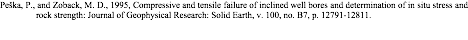

In [6]:
import numpy as np
import pandas as pd
from scipy import integrate
from matplotlib import pyplot as plt
%load_ext watermark
print('\n')
print('author:')
%watermark -a "Irene Wallis" -d
print('\n')
print('requirements:')
%watermark -v -p watermark,numpy,scipy,pandas,matplotlib
print('\n')
print('numpy, scipy, pandas & matplotlib are called by functions.py')
print('\n')
%watermark -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


author:
Irene Wallis 2020-08-26


requirements:
CPython 3.7.7
IPython 7.15.0

watermark 2.0.2
numpy 1.18.1
scipy 1.4.1
pandas 1.0.5
matplotlib 3.2.2


numpy, scipy, pandas & matplotlib are called by functions.py


Git hash: 374ed0da16f429be70993de7fa0ec93fc8151564
